<a href="https://colab.research.google.com/github/rgrAndrade/DataDive/blob/main/DataDive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
notas = pd.read_csv("https://raw.githubusercontent.com/rgrAndrade/DataDive/refs/heads/main/dados/ml-latest-small/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas["nota"].value_counts()

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [7]:
notas["nota"].mean()

3.501556983616962

<Axes: ylabel='Frequency'>

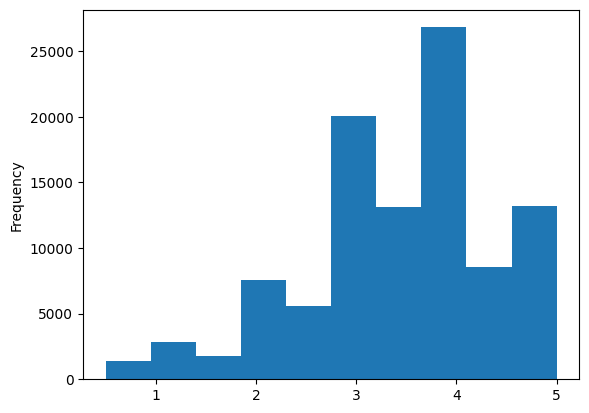

In [8]:
notas["nota"].plot(kind='hist')

In [9]:
notas["nota"].median()

3.5

In [10]:
mediana = notas["nota"].median()
media = notas["nota"].mean()
print(f"Mediana é {mediana}")
print(f"Média é {media}")

Mediana é 3.5
Média é 3.501556983616962


In [11]:
notas["nota"].describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: ylabel='nota'>

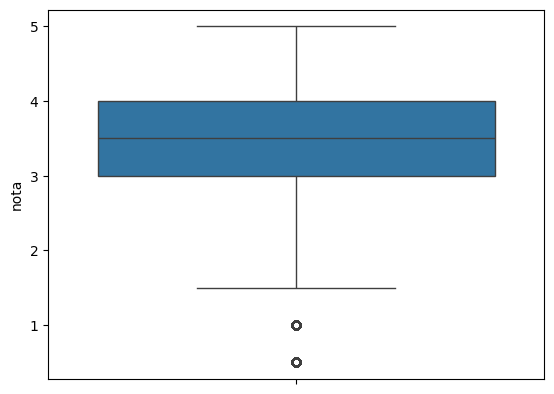

In [12]:
import seaborn as sns

sns.boxplot(notas["nota"])

In [13]:
filmes = pd.read_csv("https://raw.githubusercontent.com/rgrAndrade/DataDive/refs/heads/main/dados/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
notas.query("filmeId==1")["nota"].mean()

3.9209302325581397

In [16]:
notas.query("filmeId==2")["nota"].mean()

3.4318181818181817

In [17]:
medias_por_filme = notas.groupby("filmeId")["nota"].mean()
medias_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

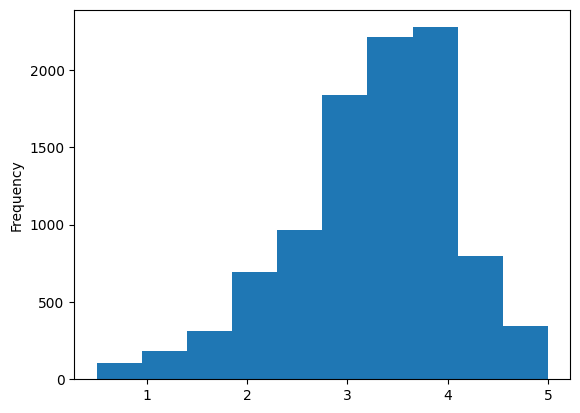

In [18]:
medias_por_filme.plot(kind="hist")

<Axes: ylabel='nota'>

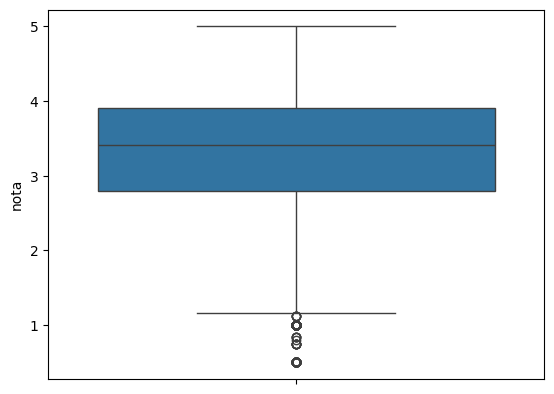

In [19]:
sns.boxplot(medias_por_filme)

In [20]:
medias_por_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


Text(0.5, 1.0, 'Histograma das médias dos filmes')

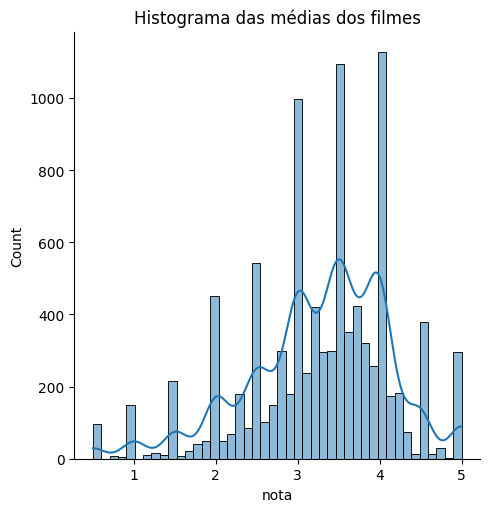

In [21]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde=True)
plt.title("Histograma das médias dos filmes")


In [22]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/rgrAndrade/DataDive/refs/heads/main/dados/archive/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


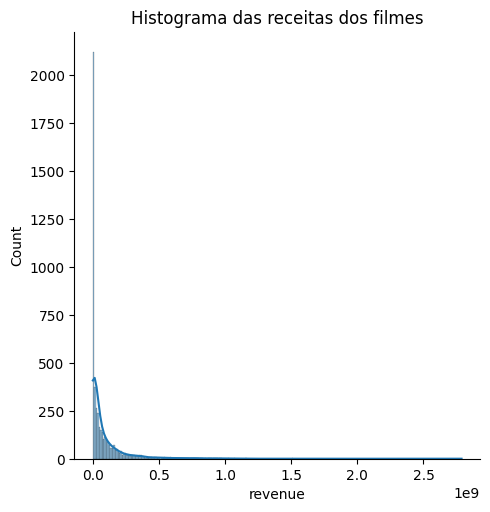

In [23]:
sns.displot(tmdb["revenue"], kde=True)
plt.title("Histograma das receitas dos filmes")
plt.show()

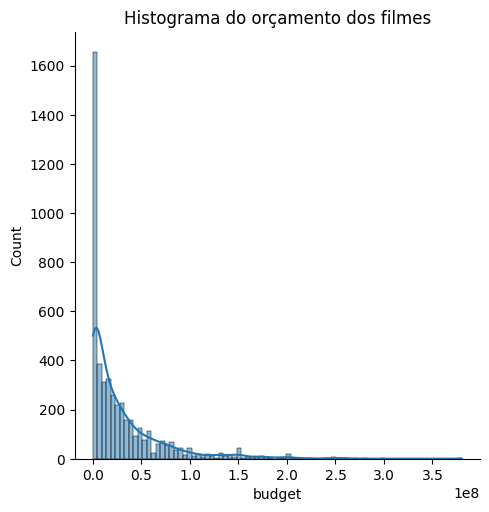

In [24]:
# prompt: gráfico de distribuição do orçamento dos filmes

sns.displot(tmdb["budget"], kde=True)
plt.title("Histograma do orçamento dos filmes")
plt.show()

In [25]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [26]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


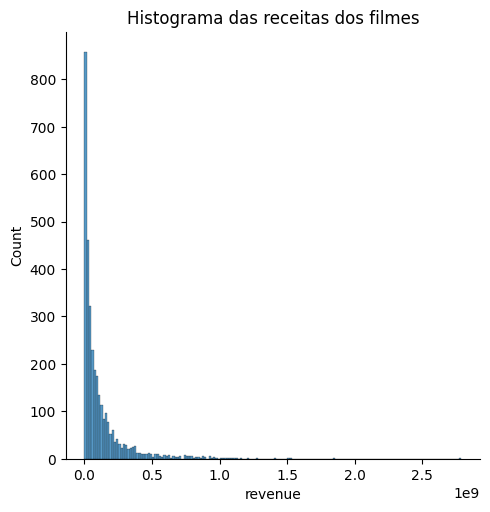

In [27]:
com_faturamento = tmdb.query('revenue > 500')
sns.displot(com_faturamento["revenue"])
plt.title("Histograma das receitas dos filmes")
plt.show()

In [28]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [29]:
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [30]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [31]:
contage_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contage_de_lingua.columns = ["original_language", "total"]
contage_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


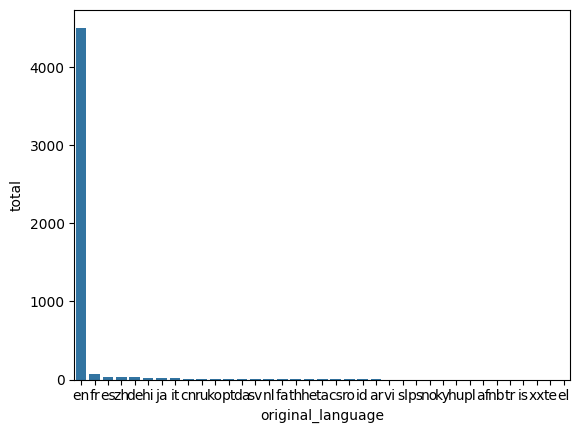

In [32]:
sns.barplot(data = contage_de_lingua, x='original_language', y='total')

plt.show()

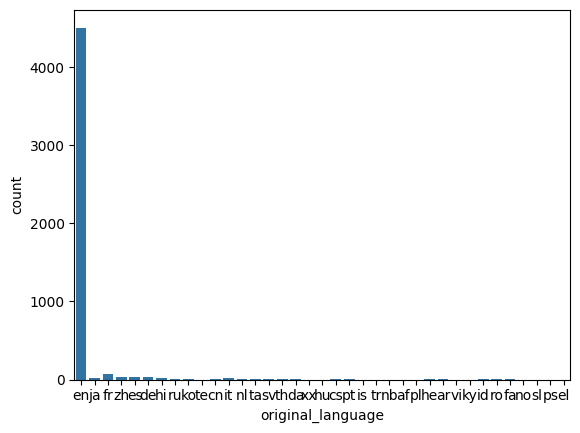

In [33]:
sns.countplot(data=tmdb, x='original_language')
plt.show()

<Axes: ylabel='total'>

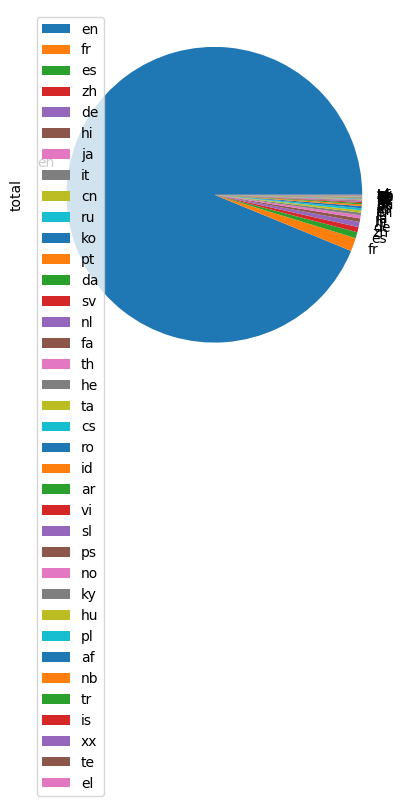

In [34]:
# show de orror que e o gráfico de pizza
contage_de_lingua.plot(kind='pie', y='total', labels=contage_de_lingua['original_language'])

In [35]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


In [36]:
dados = {
  "lingua":["ingles", "outros"],
  "total":[total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


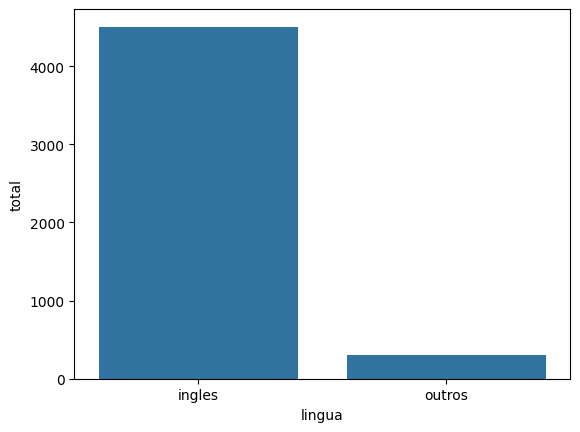

In [37]:
sns.barplot(data=dados, x='lingua', y='total')
plt.show()

<Axes: ylabel='total'>

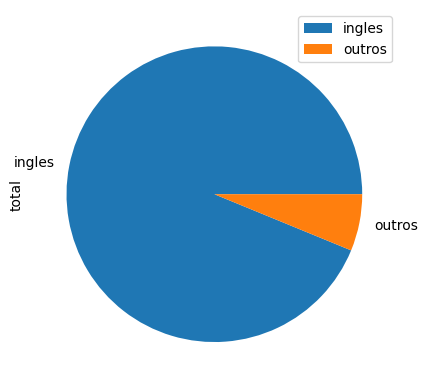

In [38]:
dados.plot(kind='pie', y='total', labels=dados['lingua'])

In [39]:
total_de_outros_filmes_por_lingua = tmdb.query('original_language != "en"')['original_language'].value_counts()
total_de_outros_filmes_por_lingua.head()

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


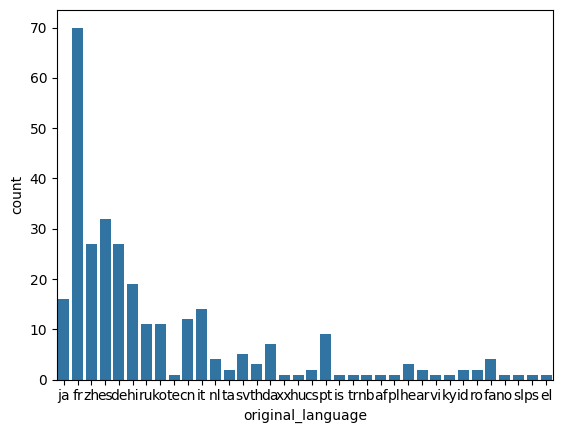

In [40]:
sns.countplot(data = tmdb.query('original_language != "en"'), x='original_language')
plt.show()

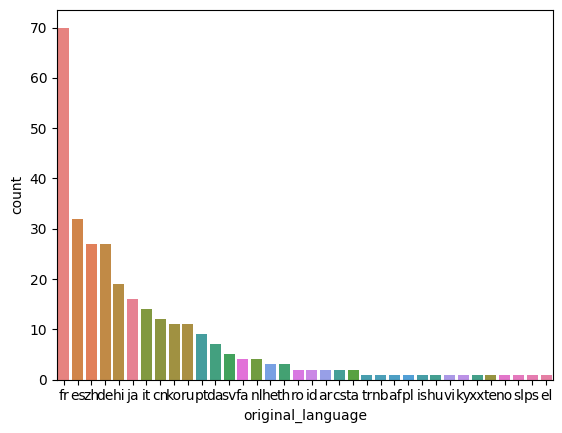

In [41]:
sns.countplot(data = tmdb.query('original_language != "en"'), order= total_de_outros_filmes_por_lingua.index, hue='original_language',
              x='original_language')
plt.show()

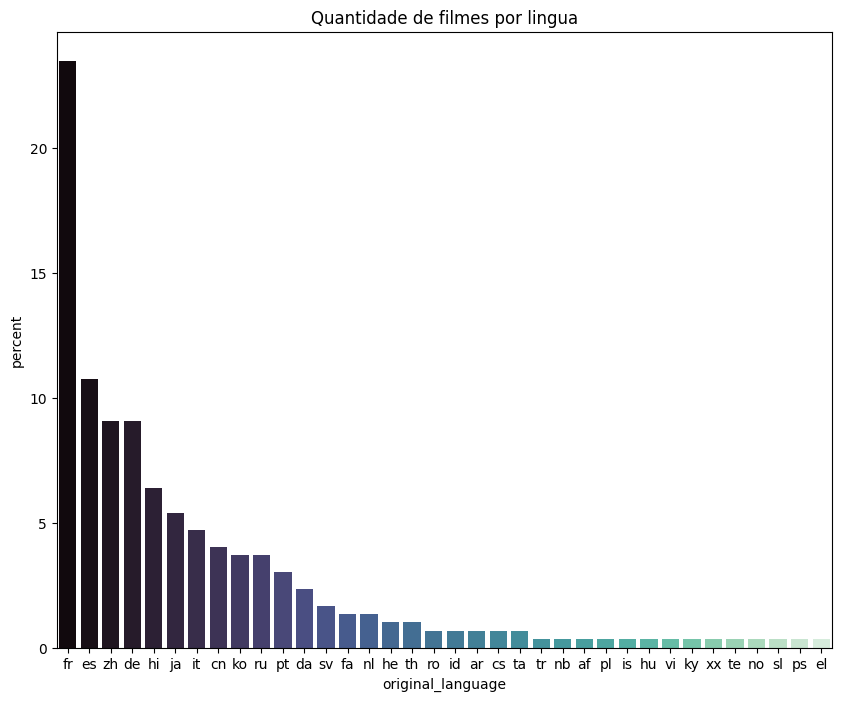

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(data = tmdb.query('original_language != "en"'),
              order= total_de_outros_filmes_por_lingua.index,
              hue='original_language',palette='mako',hue_order=total_de_outros_filmes_por_lingua.index,
              stat='percent',
              x='original_language')
plt.title("Quantidade de filmes por lingua")
plt.show()

In [43]:
tmdb.query("original_language != 'en'")["original_language"].value_counts(normalize=True)

,proportion
original_language,
fr,0.234899
es,0.107383
zh,0.090604
de,0.090604
hi,0.063758
ja,0.053691
it,0.046980
cn,0.040268
ko,0.036913


In [44]:
# Extraia a nota de dois filmes em variáveis distintas
notas_do_toy_stroller = notas.query("filmeId==1").nota
notas_do_jumanji = notas.query("filmeId==2").nota

media_do_toy_stroller = notas_do_toy_stroller.mean()
media_do_jumanji = notas_do_jumanji.mean()

print(media_do_toy_stroller, media_do_jumanji)

3.9209302325581397 3.4318181818181817


In [45]:
# prompt: mesmo mas com a meiana

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (rest of your code)

# Extraia a nota de dois filmes em variáveis distintas
notas_do_toy_stroller = notas.query("filmeId==1").nota
notas_do_jumanji = notas.query("filmeId==2").nota

media_do_toy_stroller = notas_do_toy_stroller.mean()
media_do_jumanji = notas_do_jumanji.mean()
mediana_do_toy_stroller = notas_do_toy_stroller.median()
mediana_do_jumanji = notas_do_jumanji.median()

print(f"Média do Toy Story: {media_do_toy_stroller}")
print(f"Mediana do Toy Story: {mediana_do_toy_stroller}")
print(f"Média do Jumanji: {media_do_jumanji}")
print(f"Mediana do Jumanji: {mediana_do_jumanji}")


Média do Toy Story: 3.9209302325581397
Mediana do Toy Story: 4.0
Média do Jumanji: 3.4318181818181817
Mediana do Jumanji: 3.5


In [47]:
import numpy as np

filme1 = [2.5] * 10 + [3.5] * 10
np.mean (filme1)

3.0

{'whiskers': [<matplotlib.lines.Line2D at 0x7acad0b1d840>,
 'caps': [<matplotlib.lines.Line2D at 0x7acad0b1dc60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acad0b1d5a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7acad0b1e1a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7acad0b1e440>,
 'means': []}

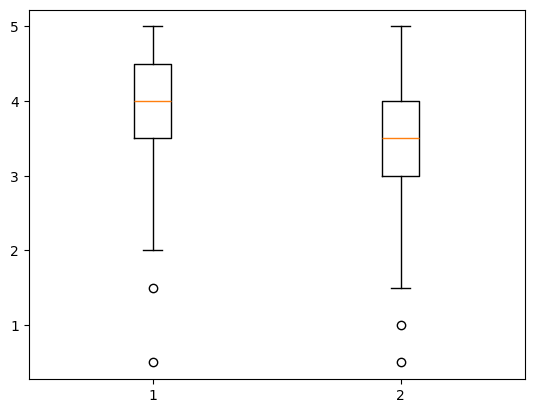

In [50]:
plt.boxplot([notas_do_toy_stroller, notas_do_jumanji])

<Axes: xlabel='filmeId', ylabel='nota'>

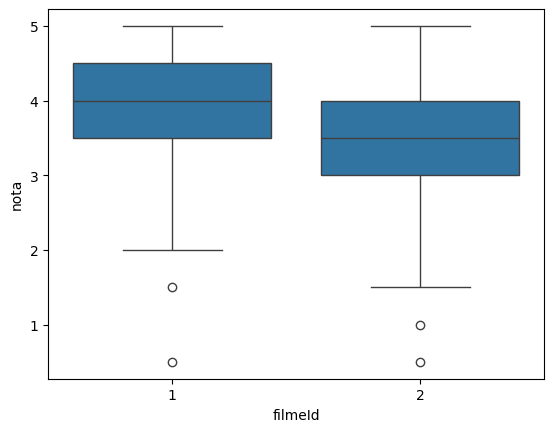

In [51]:
sns.boxplot(data=notas.query("filmeId in [1,2]"),
            x="filmeId",
            y="nota")

<ipython-input-56-fe079ef0c833>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query("filmeId in [1,2,3,4,5]"), # Changed 'filmeld' to 'filmeId'
<ipython-input-56-fe079ef0c833>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query("filmeId in [1,2,3,4,5]"), # Changed 'filmeld' to 'filmeId'


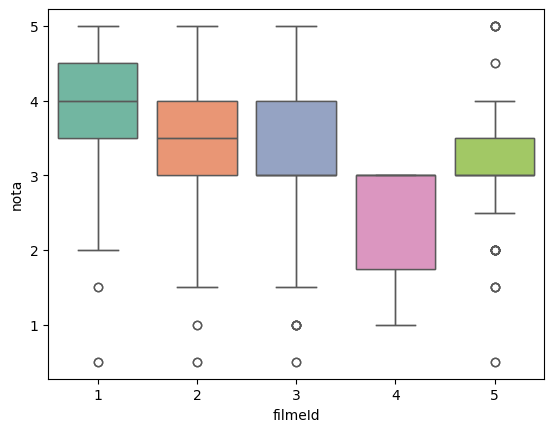

In [56]:
#prompt: mesmo grafico mas colorido

sns.boxplot(data=notas.query("filmeId in [1,2,3,4,5]"), # Changed 'filmeld' to 'filmeId'
            x="filmeId", # Changed 'filmeld' to 'filmeId'
            y="nota",
            palette="Set2")


sns.boxplot(data=notas.query("filmeId in [1,2,3,4,5]"), # Changed 'filmeld' to 'filmeId'
            x="filmeId", # Changed 'filmeld' to 'filmeId'
            y="nota",
            palette="Set2")

plt.show()

In [57]:
notas.groupby("filmeId").count()

,usuarioId,nota,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [58]:
notas.groupby("filmeId").count().query("nota == 1")

,usuarioId,nota,momento
filmeId,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1
